<a href="https://colab.research.google.com/github/Bone-Age-Maisha/Bone_imp_1/blob/main/ISO_atten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jan 28 14:55:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd


In [ ]:

import pandas as pd
train_dir = '/content/drive/MyDrive/hand_atlas/image'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [ ]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)



In [ ]:
df

,Unnamed: 0,id,boneage,gender
0,0,5014,216.30,1
1,1,5059,221.10,1
2,2,5300,226.40,1
3,3,5084,227.70,1
4,4,5342,224.40,1
...,...,...,...,...
1382,1382,6106,32.52,0
1383,1383,5234,30.02,0
1384,1384,5334,33.70,0
1385,1385,6131,24.13,0


In [ ]:
df['boneage'] = df['boneage'].astype('int')

In [ ]:
df

,Unnamed: 0,id,boneage,gender
0,0,5014,216,1
1,1,5059,221,1
2,2,5300,226,1
3,3,5084,227,1
4,4,5342,224,1
...,...,...,...,...
1382,1382,6106,32,0
1383,1383,5234,30,0
1384,1384,5334,33,0
1385,1385,6131,24,0


In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir, 
                                                         '{}.jpg'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age1=age_df

In [ ]:
age1

,Unnamed: 0,id,boneage,gender,path
0,0,5014,216,1,/content/drive/MyDrive/hand_atlas/image/5014.jpg
1,1,5059,221,1,/content/drive/MyDrive/hand_atlas/image/5059.jpg
2,2,5300,226,1,/content/drive/MyDrive/hand_atlas/image/5300.jpg
3,3,5084,227,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg
4,4,5342,224,1,/content/drive/MyDrive/hand_atlas/image/5342.jpg
...,...,...,...,...,...
1382,1382,6106,32,0,/content/drive/MyDrive/hand_atlas/image/6106.jpg
1383,1383,5234,30,0,/content/drive/MyDrive/hand_atlas/image/5234.jpg
1384,1384,5334,33,0,/content/drive/MyDrive/hand_atlas/image/5334.jpg
1385,1385,6131,24,0,/content/drive/MyDrive/hand_atlas/image/6131.jpg


In [ ]:
ag=age1.boneage.unique()
ag.shape

(225,)

In [ ]:
age1.drop(df[(age1['gender'] == 0)].index, inplace=True)

In [ ]:
age1

,Unnamed: 0,id,boneage,gender,path
0,0,5014,216,1,/content/drive/MyDrive/hand_atlas/image/5014.jpg
1,1,5059,221,1,/content/drive/MyDrive/hand_atlas/image/5059.jpg
2,2,5300,226,1,/content/drive/MyDrive/hand_atlas/image/5300.jpg
3,3,5084,227,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg
4,4,5342,224,1,/content/drive/MyDrive/hand_atlas/image/5342.jpg
...,...,...,...,...,...
859,859,3134,55,1,/content/drive/MyDrive/hand_atlas/image/3134.jpg
860,860,4486,48,1,/content/drive/MyDrive/hand_atlas/image/4486.jpg
861,861,3736,47,1,/content/drive/MyDrive/hand_atlas/image/3736.jpg
862,862,3734,59,1,/content/drive/MyDrive/hand_atlas/image/3734.jpg


In [ ]:
ag=age1.boneage.unique()
ag.shape

(214,)

In [ ]:
train1_df = age1.groupby(['boneage']).apply(lambda x: x.sample(15, replace = True)
                                                      ).reset_index(drop = True)

In [ ]:
train1_df

,Unnamed: 0,id,boneage,gender,path
0,347,5604,0,1,/content/drive/MyDrive/hand_atlas/image/5604.jpg
1,347,5604,0,1,/content/drive/MyDrive/hand_atlas/image/5604.jpg
2,504,5574,0,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg
3,347,5604,0,1,/content/drive/MyDrive/hand_atlas/image/5604.jpg
4,504,5574,0,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg
...,...,...,...,...,...
3205,3,5084,227,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg
3206,3,5084,227,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg
3207,3,5084,227,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg
3208,3,5084,227,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg


In [ ]:
from sklearn.model_selection import train_test_split
train_test1, valid1 = train_test_split(train1_df, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = train1_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train1, test1 = train_test_split(train_test1, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test1['boneage'])
print('train', train1.shape[0], 'validation', valid1.shape[0],test1.shape[0])

train 1797 validation 642 771


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (256,256)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [ ]:
train1_gen = flow_from_dataframe( core_idg, train1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1789)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1797 images


In [ ]:
valid1_gen = flow_from_dataframe(core_idg, valid1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 639) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 642 images


In [ ]:

testcore_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test1_gen = flow_from_dataframe(testcore_idg, 
                              test1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 767)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 771 images


In [ ]:
train1_X, train1_Y = next(train1_gen)

In [ ]:
train1_X.shape

(1789, 256, 256, 3)

In [ ]:
valid1_X, valid1_Y = next(valid1_gen)

In [ ]:

valid1_X.shape

(639, 256, 256, 3)

In [ ]:
test1_X, test1_Y = next(test1_gen)

In [ ]:
test1_X.shape

(767, 256, 256, 3)

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/hand_atlas/image'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [ ]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)



In [ ]:
df['boneage'] = df['boneage'].astype('int')

In [ ]:
ag=df.boneage.unique()
ag.shape

(225,)

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.jpg'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age0=age_df

In [ ]:
age0.drop(df[(age0['gender'] == 1)].index, inplace=True)

In [ ]:
age0

,Unnamed: 0,id,boneage,gender,path
515,515,4117,186,0,/content/drive/MyDrive/hand_atlas/image/4117.jpg
516,516,4389,186,0,/content/drive/MyDrive/hand_atlas/image/4389.jpg
517,517,4113,182,0,/content/drive/MyDrive/hand_atlas/image/4113.jpg
518,518,4503,188,0,/content/drive/MyDrive/hand_atlas/image/4503.jpg
519,519,4114,180,0,/content/drive/MyDrive/hand_atlas/image/4114.jpg
...,...,...,...,...,...
1382,1382,6106,32,0,/content/drive/MyDrive/hand_atlas/image/6106.jpg
1383,1383,5234,30,0,/content/drive/MyDrive/hand_atlas/image/5234.jpg
1384,1384,5334,33,0,/content/drive/MyDrive/hand_atlas/image/5334.jpg
1385,1385,6131,24,0,/content/drive/MyDrive/hand_atlas/image/6131.jpg


In [ ]:
ag=age0.boneage.unique()
ag.shape

(211,)

In [ ]:
train0_df = age0.groupby(['boneage']).apply(lambda x: x.sample(15, replace = True)
                                                      ).reset_index(drop = True)

In [ ]:
train0_df

,Unnamed: 0,id,boneage,gender,path
0,1036,4706,2,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg
1,1036,4706,2,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg
2,1036,4706,2,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg
3,1036,4706,2,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg
4,1036,4706,2,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg
...,...,...,...,...,...
3160,1225,5198,228,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg
3161,1225,5198,228,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg
3162,1225,5198,228,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg
3163,1225,5198,228,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg


In [ ]:
from sklearn.model_selection import train_test_split
train_test0, valid0 = train_test_split(train0_df, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = train0_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train0, test0 = train_test_split(train_test0, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test0['boneage'])
print('train', train0.shape[0], 'validation', valid0.shape[0],test0.shape[0])

train 1772 validation 633 760


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (256,256)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [ ]:
train0_gen = flow_from_dataframe( core_idg, train0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1772)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1772 images


In [ ]:
valid0_gen = flow_from_dataframe(core_idg, valid0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 633) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 633 images


In [ ]:


testcore_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test0_gen = flow_from_dataframe(testcore_idg, 
                              test0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 760)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 760 images


In [ ]:
train0_X, train0_Y = next(train0_gen)

In [ ]:
train0_X.shape

(1772, 256, 256, 3)

In [ ]:
train_x=[]
train_y=[]
train_gen=[]
i=0
for k in range(354):
  for j in range(5):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1
print(i)  
i=1770
for k in range(19):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    i=i+1
i=1770
del train1_Y
del train1_X

for k in range(2):
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1
del train0_Y
del train0_X


1770


In [ ]:
train_x=np.asarray(train_x)
train_x=train_x/255
train_y=np.asarray(train_y)
train_gen=np.asarray(train_gen)

In [ ]:
valid0_X, valid0_Y = next(valid0_gen)

In [ ]:
valid0_X.shape

(633, 256, 256, 3)

In [ ]:

valid_x=[]
valid_y=[]
valid_gen=[]
i=0
for k in range(211):
  for j in range(3):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    valid_x.append(valid0_X[i])
    valid_y.append(valid0_Y[i])
    valid_gen.append(0)
    i=i+1
print(i)  
i=633
for k in range(6):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    i=i+1
del valid1_Y
del valid1_X
del valid0_Y
del valid0_X

633


In [ ]:

valid_x=np.asarray(valid_x)
valid_x=valid_x/255
valid_y=np.asarray(valid_y)
valid_gen=np.asarray(valid_gen)

In [ ]:
test0_X, test0_Y = next(test0_gen)

In [ ]:
test0_X.shape

(760, 256, 256, 3)

In [ ]:
train_x.shape

(3561, 256, 256, 3)

In [ ]:
test_x=[]
test_y=[]
test_gen=[]
i=0
for k in range(152):
  for j in range(5):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    test_x.append(test0_X[i])
    test_y.append(test0_Y[i])
    test_gen.append(0)
    i=i+1
print(i)  
i=760
for k in range(7):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    i=i+1
del test1_Y
del test1_X

del test0_Y
del test0_X

760


In [ ]:
test_x=np.asarray(test_x)
test_x=test_x/255
test_y=np.asarray(test_y)
test_gen=np.asarray(test_gen)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 4
epochs = 30

In [ ]:
from tensorflow.keras import regularizers
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                   kernel_regularizer=regularizers.L2(0.1),
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  avg_pool = tf.keras.layers.Dropout(0.2)( avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 kernel_regularizer=regularizers.L2(0.1),
                                 bias_initializer=bias_initializer)  (avg_pool)  
 
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                  kernel_regularizer=regularizers.L2(0.1),
                                 activation=tf.nn.relu) (max_pool)  
 
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(kernel_regularizer=regularizers.L2(0.1),
                                 units=channel)  (max_pool)
 
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale

In [ ]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_regularizer=regularizers.L2(0.01),
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  #concat = tf.keras.layers.Dropout(0.2)( concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)
    
  return input_feature * concat

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
x=channel_attention(output)
x=spatial_attention(x)
print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)

print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=32)

87910968/87910968 [==============================] - 1s 0us/step
(None, 6, 6, 2048)
(None, 3, 3, 2048)
(None, 18464)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 tf.math.reduce_mean (TFOpLambd  (None, 1, 1, 2048)  0           ['inception

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-66-35d180b5dc61>:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
112/112 [==============================] - 85s 655ms/step - loss: 310.6136 - MAE: 44.0469 - val_loss: 259.1711 - val_MAE: 41.9119
Epoch 2/100
112/112 [==============================] - 71s 634ms/step - loss: 199.0358 - MAE: 18.3339 - val_loss: 163.6395 - val_MAE: 14.8322
Epoch 3/100
112/112 [==============================] - 73s 646ms/step - loss: 140.7677 - MAE: 15.8950 - val_loss: 118.4722 - val_MAE: 14.6649
Epoch 4/100
112/112 [==============================] - 71s 630ms/step - loss: 102.2644 - MAE: 14.5054 - val_loss: 91.2413 - val_MAE: 17.8176
Epoch 5/100
112/112 [==============================] - 70s 622ms/step - loss: 76.7254 - MAE: 14.2966 - val_loss: 66.8696 - val_MAE: 14.3692
Epoch 6/100
112/112 [==============================] - 71s 632ms/step - loss: 57.9660 - MAE: 13.1717 - val_loss: 50.8208 - val_MAE: 13.0936
Epoch 7/100
112/112 [==============================] - 70s 619ms/step - loss: 44.6851 - MAE: 12.4816 - val_loss: 37.1343 - val_MAE: 9.9663
Epoch 8/100
11

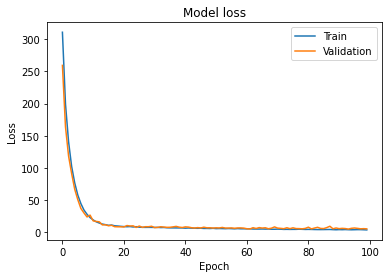

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
sq = keras.layers.GlobalAveragePooling2D()(output)
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048, kernel_regularizer=regularizers.L2(0.1),activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=16),steps_per_epoch=np.ceil(len(train_y)/16),epochs=40,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=16)

(None, 6, 6, 2048)
(None, 1, 1, 2048)
(None, 2080)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['inception_v3[0][0]']           
 alAveragePooling2D)                     

<ipython-input-68-59d29fd85e71>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=16),steps_per_epoch=np.ceil(len(train_y)/16),epochs=40,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/40
223/223 [==============================] - 91s 396ms/step - loss: 126.0946 - MAE: 32.3537 - val_loss: 53.3221 - val_MAE: 23.5133
Epoch 2/40
223/223 [==============================] - 86s 386ms/step - loss: 30.3457 - MAE: 18.3969 - val_loss: 20.4418 - val_MAE: 17.5799
Epoch 3/40
223/223 [==============================] - 82s 368ms/step - loss: 16.8534 - MAE: 15.8512 - val_loss: 15.5131 - val_MAE: 15.3246
Epoch 4/40
223/223 [==============================] - 83s 373ms/step - loss: 15.1687 - MAE: 15.0955 - val_loss: 12.4663 - val_MAE: 12.4408
Epoch 5/40
223/223 [==============================] - 82s 368ms/step - loss: 14.0813 - MAE: 14.0590 - val_loss: 20.6749 - val_MAE: 20.6590
Epoch 6/40
223/223 [==============================] - 82s 369ms/step - loss: 13.0867 - MAE: 13.0688 - val_loss: 12.3807 - val_MAE: 12.3619
Epoch 7/40
223/223 [==============================] - 82s 369ms/step - loss: 12.2776 - MAE: 12.2616 - val_loss: 11.7654 - val_MAE: 11.7504
Epoch 8/40
223/223 [======

============================================================

In [ ]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)  
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)  
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale

In [ ]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)
    
  return input_feature * concat

In [ ]:
def conv2d_bn(x,filters,num_row,num_col,padding='same',strides=(1, 1)):
   
    x = keras.layers.Conv2D(filters, (num_row, num_col),padding=padding)(x)
    x = keras.layers.BatchNormalization(axis=3, scale=False)(x)
    x = keras.layers.Activation('relu')(x)
    return x

    #x = conv2d_bn(x, 32, 3, 3, padding='valid') 

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
sq = keras.layers.GlobalAveragePooling2D()(output)
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=32)

(None, 6, 6, 2048)
(None, 1, 1, 2048)
(None, 2080)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 global_average_pooling2d_5 (Gl  (None, 2048)        0           ['inception_v3[0][0]']           
 obalAveragePooling2D)                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-78-d7b7d3294834>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
112/112 [==============================] - 85s 587ms/step - loss: 36.8941 - MAE: 36.8941 - val_loss: 18.2093 - val_MAE: 18.2093
Epoch 2/100
112/112 [==============================] - 63s 561ms/step - loss: 17.3134 - MAE: 17.3134 - val_loss: 15.5418 - val_MAE: 15.5418
Epoch 3/100
112/112 [==============================] - 60s 534ms/step - loss: 15.7419 - MAE: 15.7419 - val_loss: 15.6427 - val_MAE: 15.6427
Epoch 4/100
112/112 [==============================] - 59s 529ms/step - loss: 14.6431 - MAE: 14.6431 - val_loss: 17.4029 - val_MAE: 17.4029
Epoch 5/100
112/112 [==============================] - 60s 534ms/step - loss: 13.1907 - MAE: 13.1907 - val_loss: 12.7512 - val_MAE: 12.7512
Epoch 6/100
112/112 [==============================] - 60s 530ms/step - loss: 12.6000 - MAE: 12.6000 - val_loss: 11.3340 - val_MAE: 11.3340
Epoch 7/100
112/112 [==============================] - 60s 530ms/step - loss: 11.8991 - MAE: 11.8991 - val_loss: 12.3291 - val_MAE: 12.3291
Epoch 8/100
112/112 

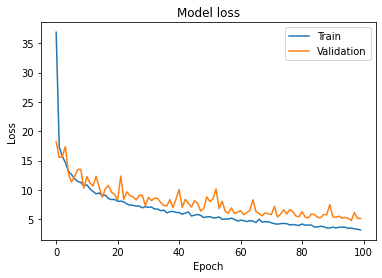

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
x=channel_attention(output)
print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=32)

(None, 6, 6, 2048)
(None, 3, 3, 2048)
(None, 18464)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 tf.math.reduce_mean_1 (TFOpLam  (None, 1, 1, 2048)  0           ['inception_v3[0][0]']           
 bda)                                   

<ipython-input-81-b169a3e5e698>:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
112/112 [==============================] - 89s 602ms/step - loss: 37.6427 - MAE: 37.6427 - val_loss: 36.5193 - val_MAE: 36.5193
Epoch 2/100
112/112 [==============================] - 62s 550ms/step - loss: 16.8698 - MAE: 16.8698 - val_loss: 25.9521 - val_MAE: 25.9521
Epoch 3/100
112/112 [==============================] - 60s 536ms/step - loss: 15.3366 - MAE: 15.3366 - val_loss: 19.2943 - val_MAE: 19.2943
Epoch 4/100
112/112 [==============================] - 61s 541ms/step - loss: 14.1668 - MAE: 14.1668 - val_loss: 11.6105 - val_MAE: 11.6105
Epoch 5/100
112/112 [==============================] - 61s 541ms/step - loss: 13.2581 - MAE: 13.2581 - val_loss: 14.8916 - val_MAE: 14.8916
Epoch 6/100
112/112 [==============================] - 60s 531ms/step - loss: 12.3964 - MAE: 12.3964 - val_loss: 14.3600 - val_MAE: 14.3600
Epoch 7/100
112/112 [==============================] - 60s 530ms/step - loss: 12.0811 - MAE: 12.0811 - val_loss: 11.6804 - val_MAE: 11.6804
Epoch 8/100
112/112 

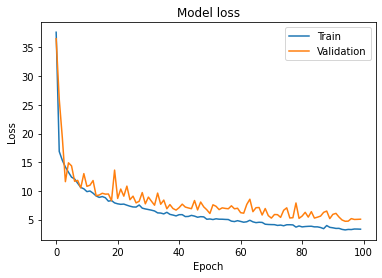

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
x=spatial_attention(output)
print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=32)

(None, 6, 6, 2048)
(None, 3, 3, 2048)
(None, 18464)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 tf.math.reduce_mean_2 (TFOpLam  (None, 6, 6, 1)     0           ['inception_v3[0][0]']           
 bda)                                   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-83-0c2bfd2c9896>:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
112/112 [==============================] - 69s 548ms/step - loss: 37.0627 - MAE: 37.0627 - val_loss: 27.3366 - val_MAE: 27.3366
Epoch 2/100
112/112 [==============================] - 61s 542ms/step - loss: 17.0168 - MAE: 17.0168 - val_loss: 15.5364 - val_MAE: 15.5364
Epoch 3/100
112/112 [==============================] - 60s 537ms/step - loss: 15.6572 - MAE: 15.6572 - val_loss: 15.0350 - val_MAE: 15.0350
Epoch 4/100
112/112 [==============================] - 60s 542ms/step - loss: 14.3774 - MAE: 14.3774 - val_loss: 15.4713 - val_MAE: 15.4713
Epoch 5/100
112/112 [==============================] - 59s 525ms/step - loss: 13.7375 - MAE: 13.7375 - val_loss: 13.5956 - val_MAE: 13.5956
Epoch 6/100
112/112 [==============================] - 60s 535ms/step - loss: 12.9248 - MAE: 12.9248 - val_loss: 12.9278 - val_MAE: 12.9278
Epoch 7/100
112/112 [==============================] - 59s 526ms/step - loss: 11.8789 - MAE: 11.8789 - val_loss: 14.9942 - val_MAE: 14.9942
Epoch 8/100
112/112 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
x=channel_attention(output)
x=spatial_attention(x)
print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=32),steps_per_epoch=np.ceil(len(train_y)/32),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=32)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()